## Sellmeier's equation:

It is usual to model the dispersion of transparent optical materials with Sellmeier's equation:

$$
n^2(\lambda) = 1 + \sum_{k=1}^{m}{\frac{A_k \lambda^2}{\lambda^2 - B_k}},
$$

where we are modeling $m$ independent resonances. Writing this equation in terms of $\omega$ we get:

$$
n^2(\omega) = 1 + \sum_{k=1}^{m}{\frac{\omega_k^2}{\omega_k^2 - \omega^2} \chi_k^{(1)}},
$$

with:

$$
\chi_k^{(1)} = A_k \\
\omega_k = \frac{2\pi c}{\sqrt {B_k}}.
$$

Each one of these equations is a solution of Lorentz Equation:

$$
\frac{d^2P(t)}{dt^2} + \omega_k^2 P(t) = \epsilon_0 \omega_k^2 \, \chi_k^{(1)} E(t).
$$

In this notebook we display the refractive index of the main materials we are interested in using published models based on the Sellmeier equation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0
from ..Modules import materials

ValueError: attempted relative import beyond top-level package

In [2]:
'''
This blocks defines the main function and materials used throughout.
'''

def sellmeier(A, B, wl):
    '''
    Parameters
    ----------
    A : ARRAY
        Ak coefficients
    B : ARRAY
        Bk coefficients
    wl : SCALAR
        Wavelegnth.

    Returns
    -------
    Refractive index from Sellmeiers expansion

    '''
    n2 = 1

    for k in range(A.size):
        n2 += A[k]*wl**2/(wl**2 - B[k])

    return np.sqrt(n2)

def refractive_index(material, wl):
    '''
    Parameters
    ----------
    material : STRING
        'SiO2', 'Sapphire', 'LN_MgO_o', 'LN_MgO_e', 'LN_o', 'LN_e'
    wl : SCALAR
        Wavelength

    Returns
    -------
    Refractive index at given wavelength

    '''
    A = 0
    B = 0
    if material=='SiO2':
        A = np.array([0.6961663, 0.4079426, 0.8974794])
        B = np.array([0.0684043, 0.1162414, 9.896161])
        B = B**2
    elif material=='Sapphire':
        A = np.array([1.5039759, 0.55069141, 6.5927379])
        B = np.array([0.0740288, 0.1216529, 20.072248])
        B = B**2
    elif material=='LN_MgO_e':
        A = np.array([2.2454, 1.3005, 6.8972])
        B = np.array([0.01242, 0.05313, 331.33])
    elif material=='LN_MgO_o':
        A = np.array([2.4272, 1.4617, 9.6536])
        B = np.array([0.01478, 0.05612, 371.216])
    elif material=='LN_o':
        A = np.array([2.6734, 1.2290, 12.614])
        B = np.array([0.01764, 0.05914, 474.6])
    elif material=='LN_e':
        A = np.array([2.9804, 0.5981, 8.9543])
        B = np.array([0.02047, 0.0666, 416.08])
    else:
        print('wrong material')

    return sellmeier(A, B, wl)

## Wavelength Range

In [3]:
#Wavelength range
wl_start = 0.5
wl_stop = 5.0
wl_step = 0.1
wl = np.arange(wl_start, wl_stop+wl_step, wl_step)

## Congruently grown LN with 5-mol% MgO

Text(0.5, 1.0, 'Congruently grown $\\mathrm{LiNbO_3}$ doped with 5-mol% MgO')

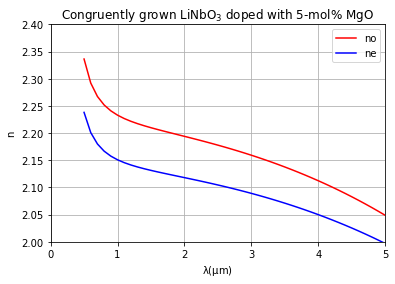

In [4]:
no_LN_doped = refractive_index('LN_MgO_o', wl)
ne_LN_doped = refractive_index('LN_MgO_e', wl)

plt.plot(wl, no_LN_doped, 'r')
plt.plot(wl, ne_LN_doped, 'b')
plt.legend(['no','ne'])
plt.axis([0, wl_stop, 2, 2.4])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown $\mathrm{LiNbO_3}$ doped with 5-mol% MgO')

## Congruently grown LN (undoped)

Text(0.5, 1.0, 'Congruently grown $\\mathrm{LiNbO_3}$ (undoped)')

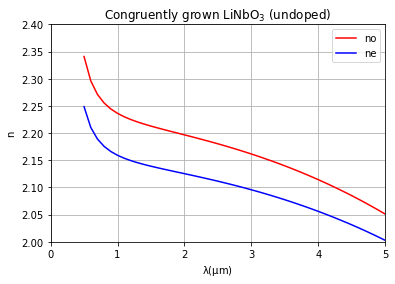

In [5]:
no_LN_undoped = refractive_index('LN_o', wl)
ne_LN_undoped = refractive_index('LN_e', wl)

plt.plot(wl, no_LN_undoped, 'r')
plt.plot(wl, ne_LN_undoped, 'b')
plt.legend(['no','ne'])
plt.axis([0, wl_stop, 2, 2.4])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown $\mathrm{LiNbO_3}$ (undoped)')

## Sapphire ($\mathrm{Al}_2\mathrm{O}_3$)

Note: Sapphire is slightly annisotropic. I'll add the extraordinary index soon.

Text(0.5, 1.0, 'Sapphire ($\\mathrm{Al_2O_3}$)')

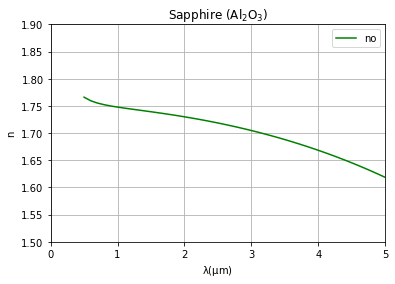

In [6]:
no_Sa = refractive_index('Sapphire', wl)

plt.plot(wl, no_Sa, 'g')
#plt.plot(wl, ne_Sa, 'b')
plt.legend(['no'])
plt.axis([0, 5, 1.5, 1.9])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Sapphire ($\mathrm{Al_2O_3}$)')

## All materials

Text(0.5, 1.0, 'Congruently grown $\\mathrm{LiNbO_3}$ doped with 5-mol% MgO')

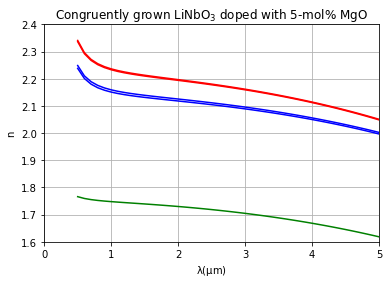

In [7]:
plt.plot(wl, no_LN_doped, 'r')
plt.plot(wl, ne_LN_doped, 'b')
plt.plot(wl, no_LN_undoped, 'r')
plt.plot(wl, ne_LN_undoped, 'b')
plt.plot(wl, no_Sa, 'g')

plt.axis([0, wl_stop, 1.6, 2.4])
plt.xlabel('$\mathrm{\lambda (\mu m)}$')
plt.ylabel('$\mathrm{n}$')
plt.grid()
plt.title('Congruently grown $\mathrm{LiNbO_3}$ doped with 5-mol% MgO')

## References:
[1]D. E. Zelmon, D. L. Small, and D. Jundt, “Infrared corrected Sellmeier coefficients for congruently grown lithium niobate and 5 mol% magnesium oxide –doped lithium niobate,” J. Opt. Soc. Am. B, vol. 14, no. 12, p. 3319, Dec. 1997.

[2]I. H. Malitson, “Refraction and Dispersion of Synthetic Sapphire,” J. Opt. Soc. Am., JOSA, vol. 52, no. 12, pp. 1377–1379, Dec. 1962.
